In [42]:
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline

In [28]:
def dataGenerator(nb):
    X = np.random.uniform(-3,10,nb)
    y = 10*np.sin(X)/X + np.random.normal(0,1,nb)
    return X,y
    

[]

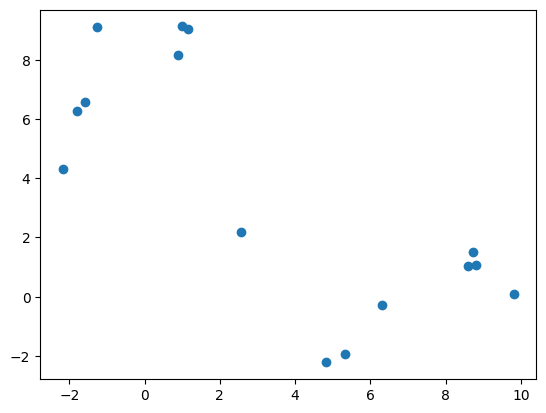

In [32]:
X,y=dataGenerator(15)
plt.scatter(X,y)
plt.plot()

In [56]:
degree=1

poly = PolynomialFeatures(degree)
model = make_pipeline(poly ,Ridge())

model.fit(X.reshape(-1,1),y)

y_pred = model.predict(X.reshape(-1,1))

RSS= np.sum((y-y_pred)**2)
RSS


108.62810859054038

[]

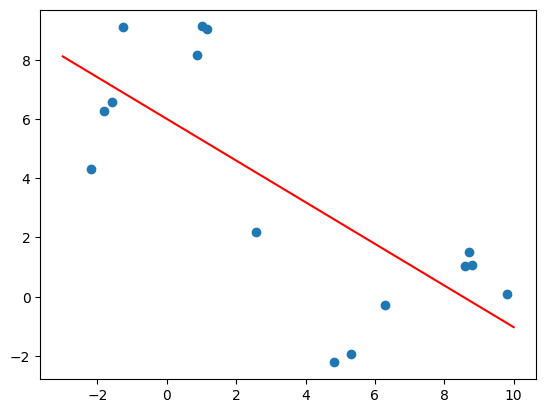

In [61]:
x_test = np.linspace(-3,10,100)
y_test = model.predict(x_test.reshape(-1,1))
plt.scatter(X,y)
plt.plot(x_test,y_test,c='r')
plt.plot()

Degree 1 : Residual sum of squares : 108.62810859054038
Degree 3 : Residual sum of squares : 45.51983062404466
Degree 6 : Residual sum of squares : 2.9271094672997795


/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=1.17668e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Degree 9 : Residual sum of squares : 3.22963820535956


/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=1.11247e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Degree 12 : Residual sum of squares : 2.0099056199167262


[]

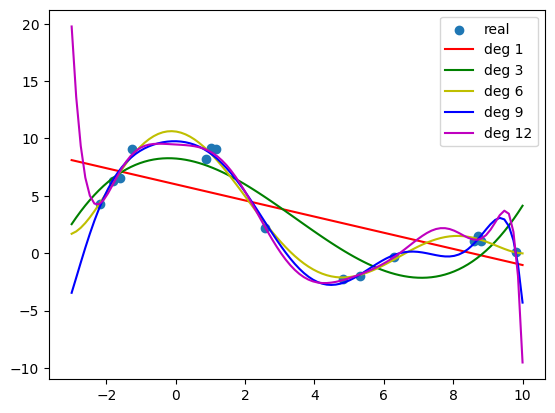

In [101]:
degrees = [1, 3, 6, 9, 12]
colors = ['r','g','y','b','m']
models=[]
train_rss=[]
i=0
plt.scatter(X,y,label="real")
for deg in degrees:
    poly = PolynomialFeatures(deg)
    model = make_pipeline(poly ,Ridge())

    model.fit(X.reshape(-1,1),y)
    models.append(model)

    y_pred = model.predict(X.reshape(-1,1))

    RSS= np.sum((y-y_pred)**2)
    train_rss.append(RSS)
    print("Degree {} : Residual sum of squares : {}".format(deg,RSS))
    x_test = np.linspace(-3,10,100)
    y_test = model.predict(x_test.reshape(-1,1))
    plt.plot(x_test,y_test,c=colors[i],label="deg "+str(deg))
    i=i+1
plt.legend()
plt.plot()


In [103]:
X_test,y_test = dataGenerator(100)
i=0
test_rss=[]
for model in models:
    y_test_pred= model.predict(X_test.reshape(-1,1))
    RSS= np.sum((y_test-y_test_pred)**2)
    test_rss.append(RSS)
    print("Degree {} : Residual sum of squares on test : {}".format(degrees[i],RSS))
    i=i+1
    

for model in models:
    i=0
    print("Degree {} : R-squared : {}".format(degrees[i],model.score(X_test.reshape(-1,1),y_test)))
    i=i+1
    
    
    

Degree 1 : Residual sum of squares on test : 1287.6583907824881
Degree 3 : Residual sum of squares on test : 708.1689395120349
Degree 6 : Residual sum of squares on test : 155.43995211281253
Degree 9 : Residual sum of squares on test : 237.5992858503083
Degree 12 : Residual sum of squares on test : 1404.0108880424436
Degree 1 : R-squared : 0.08676668027600487
Degree 1 : R-squared : 0.49775229502990015
Degree 1 : R-squared : 0.8897588486963066
Degree 1 : R-squared : 0.831489790976883
Degree 1 : R-squared : 0.004247140861272647


[]

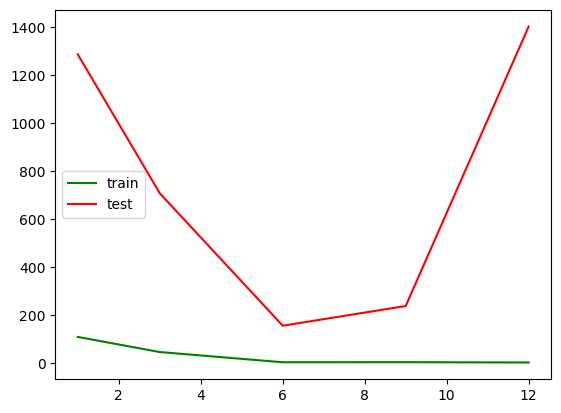

In [113]:
plt.plot(degrees,train_rss,c='g',label="train")
plt.plot(degrees,test_rss,c='r',label="test")
plt.legend()
plt.plot()